Olá,

Neste arquivo eu apresento minha solução para o desafio Seazone para a vaga Analista de dados junior.

Primeiramente realizou-se a importação das bibliotecas necessarias:

In [122]:
import pandas as pd
import seaborn as srn
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.preprocessing import LabelEncoder

import sys

import sklearn.neighbors._base

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

**É importante salientar que caso não haja problemas de compatibilidade com a biblioteca missingpy com sua maquina esta parte do codigo apresentada acima pode ser ignorada.**

A seguir carregou-se os conjuntos de dados e visualizou-se suas as primeiras linhas.

Os dados se encontram na pasta dados seazone.

In [123]:
#Carregando os dados

#altere o diretorio para pasta que contem os dados em sua maquina
%cd "C:\Users\camil\Documents\seazone" 


df_detalhes = pd.read_csv('desafio_details.csv')
df_price = pd.read_csv('desafio_priceav.csv')
df_detalhes.head()

C:\Users\camil\Documents\seazone


,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [124]:
df_price.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


Observou-se que no dataframe há colunas desnecessarias utilizadas como indice que podem ser removidas sem nenhum prejuizo, conforme apresentado abaixo:

In [125]:
df_price= df_price.drop("Unnamed: 0", axis =1)
df_price= df_price.drop("Unnamed: 0.1", axis =1)
df_detalhes= df_detalhes.drop("Unnamed: 0", axis =1)

df_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied
0,40201349,blank,2020-11-15,250.0,0
1,40201349,blank,2020-11-26,250.0,0
2,40201349,blank,2020-11-27,250.0,0
3,40201349,blank,2020-12-10,250.0,0
4,40201349,blank,2021-02-01,250.0,0


In [126]:
df_detalhes.head()

,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


Visualizou-se a dimensão dos dois conjuntos de dados e removemos as linhas duplicadas. Após as alterações observamos novamente a dimensão dos dados e podemos observar que o dataframe "df_price" possuia linhas duplicadas.

Em seguida observamos a quantidade de valores nulos.

In [128]:
#observado a dimensao dos dataframes
print(f'Dimensão dos dados de preço dos listing')
print(df_detalhes.shape, '\n')
print(f'Dimensão dos dados de caracteristicas dos listing')
print(df_price.shape, '\n')
#removendo linhas duplicadas
df_detalhes = df_detalhes.drop_duplicates()
df_price = df_price.drop_duplicates()
#dimensões após alterações
print(f'Dimensão dos dados de preço dos listing após a remoção de linhas duplicadas')
print(df_detalhes.shape, '\n')
print(f'Dimensão dos dados de caracteristicas dos listing após a remoção de linhas duplicadas')
print(df_price.shape, '\n')
print(f'Valores nulos dos dados de caracteristicas dos listing')
#Valores nulos para os datalhes
print(df_detalhes.isnull().sum(), "\n")
#Valores nulos para os dados de preço
print(f'Valores nulos dos dados de preço dos listing')
print(df_price.isnull().sum())


Dimensão dos dados de preço dos listing
(4691, 8) 

Dimensão dos dados de caracteristicas dos listing
(284086, 5) 

Dimensão dos dados de preço dos listing após a remoção de linhas duplicadas
(4691, 8) 

Dimensão dos dados de caracteristicas dos listing após a remoção de linhas duplicadas
(284086, 5) 

Valores nulos dos dados de caracteristicas dos listing
airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64 

Valores nulos dos dados de preço dos listing
airbnb_listing_id    0
booked_on            0
date                 0
price_string         0
occupied             0
dtype: int64


Na celula abaixo substituiu-se os valores faltantes pela mediana dos mesmos, como a quantidade de valores nulos é baixa nas colunas "number_of_bedrooms", "number_of_bathrooms" e "numero number_of_reviews" essa aproximação não trará problemas.

In [130]:
df_detalhes['number_of_bedrooms'] = df_detalhes['number_of_bedrooms'].fillna(df_detalhes['number_of_bedrooms'].median())
df_detalhes['number_of_bathrooms'] = df_detalhes['number_of_bathrooms'].fillna(df_detalhes['number_of_bathrooms'].median())
df_detalhes['number_of_reviews'] = df_detalhes['number_of_reviews'].fillna(df_detalhes['number_of_reviews'].median())


Como a coluna "star_rating" é de importancia no modelo não pode ser excluida apesar de cerca de 40% de seus valores serem nulos, para uma imputação mais acertiva e com menor vies foi utilizado o algortimo de RandomForest para imputar os valores nulos dessa variavel.

In [131]:
#removendo colunas que não auxiliam na predição
df_detalhes2 = df_detalhes
df_detalhes2 = df_detalhes2.drop(['ad_name','airbnb_listing_id'], axis=1)

#codificando colunas categoricas
labelencoder = LabelEncoder()
df_detalhes2['suburb'] = labelencoder.fit_transform(df_detalhes2['suburb'])
df_detalhes2['is_superhost'] = labelencoder.fit_transform(df_detalhes2['is_superhost'])

#convertendo a coluna 'star_rating' para str para que o modelo não faça uma regressão e sim use o classificador
df_detalhes2['star_rating'] = df_detalhes2['star_rating'].astype(str)

#imputando valores faltantes
imputer = MissForest()
X_imputed = imputer.fit_transform(df_detalhes2)
df_detalhes["star_rating"]= X_imputed

C:\Users\camil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


C:\Users\camil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1


C:\Users\camil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 2


Verificou-se então que não restam mais valores nulos nos dados de caracteristicas dos listings:

In [144]:
df_detalhes.isnull().sum()

airbnb_listing_id      0
suburb                 0
ad_name                0
number_of_bedrooms     0
number_of_bathrooms    0
star_rating            0
is_superhost           0
number_of_reviews      0
dtype: int64

Com o tratamento dos dados ja concluido, realizou-se o primeiro item do desafio:

"Ordene os bairros em ordem crescente de número de listings"

Para isso através da função groupby observou-se a relação dos bairros e números de anúncios conforme apresentado.

suburb
Canasvieiras          1177
Centro                 278
Ingleses              2388
Jurerê                 539
Lagoa da Conceição     309
dtype: int64


<AxesSubplot:xlabel='Bairro', ylabel='Número de Listings'>

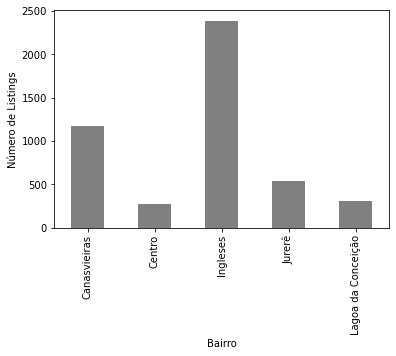

In [143]:
bairro_listining = df_detalhes.groupby(["suburb"]).size()
print(bairro_listining)
bairro_listining.plot.bar(color = 'gray', xlabel = "Bairro", ylabel = "Número de Listings")

Pode-se observar que a ordem crescente de número de listing por bairros é: 

Centro < Lagoa da Conceição < Jurerê < Canasvieiras < Ingleses



O segundo do desafio é:
" Ordene os bairros em ordem crescente de faturamento médio dos listings "

Primeiramente nos dados de preço extraimos através da função groupby o id do listing, a ocupação, pois só ocorre faturamento se o imovel tenha sido alugado e a média de preço do anuncio.

In [134]:
df1 = df_price.groupby(['airbnb_listing_id', 'occupied'])['price_string'].mean()
df1 = pd.DataFrame(df1.reset_index(name = "faturamento_medio"))
df1.head()

,airbnb_listing_id,occupied,faturamento_medio
0,108658,0,373.333333
1,108658,1,366.666667
2,128631,0,721.707317
3,128631,1,636.363636
4,279586,0,243.076923


Nos dados de caracteristicas dos listing relacionamos o id do listing com o bairro

In [135]:
df2 = df_detalhes.groupby('airbnb_listing_id')['suburb'].sum()
df2 = pd.DataFrame(df2.reset_index(name = "bairro"))
df2.head()

,airbnb_listing_id,bairro
0,108658,Canasvieiras
1,128631,Ingleses
2,279586,Canasvieiras
3,291437,Centro
4,317970,Ingleses


In [136]:
df_fat = pd.merge(df1, df2, how = 'outer', on = 'airbnb_listing_id')
print(df_fat.shape)
df_fat.head()

(7698, 4)


,airbnb_listing_id,occupied,faturamento_medio,bairro
0,108658,0.0,373.333333,Canasvieiras
1,108658,1.0,366.666667,Canasvieiras
2,128631,0.0,721.707317,Ingleses
3,128631,1.0,636.363636,Ingleses
4,279586,0.0,243.076923,Canasvieiras


E finalmente unimos as relações através do numero de id do listing e consegumos encontrar faturamento médio dos listings de cada bairro.

               bairro  occupied  faturamento_medio
1        Canasvieiras       1.0         307.952131
3              Centro       1.0         244.397553
5            Ingleses       1.0         373.481457
7              Jurerê       1.0         434.282142
9  Lagoa da Conceição       1.0         265.375229


<AxesSubplot:xlabel='Bairro', ylabel='Faturamento Médio'>

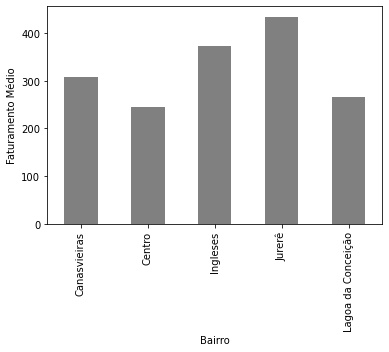

In [137]:
bairro_faturamento = df_fat.groupby(['bairro', 'occupied'])['faturamento_medio'].mean()
bairro_faturamento = pd.DataFrame(bairro_faturamento.reset_index(name = "faturamento_medio"))
bairro_faturamento = bairro_faturamento[bairro_faturamento["occupied"] == 1 ]
print(bairro_faturamento)
bairro_faturamento.plot.bar(x = "bairro", y = "faturamento_medio", color = 'gray', legend = False, ylabel = "Faturamento Médio", xlabel = "Bairro")

Pode-se observar então que a ordem crescente dos bairros por faturamento é:

Centro < Lagoa da Conceição < Canasvieiras < Ingleses < Jurerê

O terceiro item do desafio é:

"Existem correlações entre as características de um anúncio e seu faturamento? Quais? Explique"

Primeiramente selecionou-se apenas as linhas dos dados em que houve a ocupação e consequentemente faturamento.

In [151]:
df_price= df_price[df_price['occupied'] == 1]

df_price.head()


,airbnb_listing_id,booked_on,date,price_string,occupied
12,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1


Agrupou-se o id do listing pelo seu faturamento

In [152]:
faturamento = df_price.groupby('airbnb_listing_id')['price_string'].sum()

faturamento = pd.DataFrame(faturamento.reset_index(name = "faturamento"))
faturamento.head()

,airbnb_listing_id,faturamento
0,108658,20900.0
1,128631,28000.0
2,279586,3190.0
3,317970,3112.0
4,333619,12076.0


Uniu-se as informações do conjuto de dados de carcteristicas dos listings (df_detalhes) com o faturamento através do id do anuncio.

O faturamento dos id dos listings que não arrecadaram foram preenchidos por 0 para não constar como valores nulos.

In [153]:
df_faturamento = pd.merge(df_detalhes, faturamento, how = 'outer', on = 'airbnb_listing_id')
print(df_faturamento.shape)

#Preenchendo valores nulos de Id que não faturaram por 0
df_faturamento['faturamento'] = df_faturamento['faturamento'].fillna(0)

#visualizando
df_faturamento.head()

(4691, 9)


,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,faturamento
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,3.0,False,15.0,6400.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,0.0,False,0.0,8640.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,2.0,True,13.0,8078.0
3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,2.0,True,28.0,0.0
4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,0.0,True,35.0,14810.0


Calculou-se a correlação.

Primeiramente foi verificada a correlação de Pearson:

In [154]:
#correlação de pearson
correlation = df_faturamento.corr()
print(correlation['faturamento'])

airbnb_listing_id      0.049163
number_of_bedrooms     0.121459
number_of_bathrooms    0.139180
star_rating            0.051157
is_superhost           0.097429
number_of_reviews      0.137211
faturamento            1.000000
Name: faturamento, dtype: float64


<AxesSubplot:>

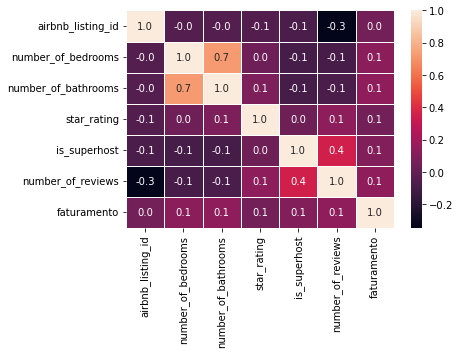

In [155]:
plot = srn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.8)
plot

Contatou-se que há correlações positivas bem fracas entre o faturamento e o número de banheiros, número de quartos e número de comentários (correlação de Pearson de aproximadamente 0.1) essas correlações significam que cerca 1% da variação do faturamento pode ser explicada por essas variáveis, sendo ainda que o impacto causado é positivo no sentido de aumentar o faturamento. As variáveis nota do anúncio e superhost tem coeficiente inferior a 0.1, sendo então, considerados desprezíveis pela maioria dos autores. É importante salientar que alguns autores sugerem que as correlações fracas são acima de 0.3 e não de 0.1. Assim, o julgamento deve ser realizado pelo analista que pode calcular um valor de p para auxilia-lo na decisão a um nível de significância e verificar se o coeficiente é significativo ou não. 

O coeficiente de correlação de Pearson mede a correlação linear entre as variáveis, a fim de se verificar se há uma correlação não linear também calculou-se o coeficiente de correlação de Spearman 

In [156]:
#correlação de sperman
correlation = df_faturamento.corr(method = 'spearman')
print(correlation['faturamento'])

airbnb_listing_id      0.033166
number_of_bedrooms     0.055547
number_of_bathrooms    0.087224
star_rating            0.032183
is_superhost           0.098333
number_of_reviews      0.157268
faturamento            1.000000
Name: faturamento, dtype: float64


<AxesSubplot:>

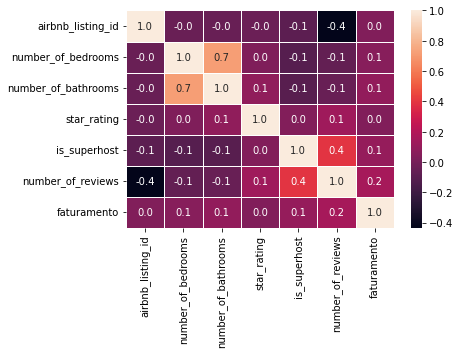

In [157]:
plot = srn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.8)
plot

Conforme observado os valores não diferem muito do coeficiente de Pearson, possuindo correlações desprezíveis ou bem fracas.

Dessa forma, deve-se buscar outras variáveis que possam ter maior correlação com o faturamento afim de descobrir possíveis formas de maximiza-lo. As variáveis categóricas não dicotômicas bairros e título não são passiveis de aplicação de correlação, porém elas podem influenciar o faturamento, outra forma de associação deve ser utilizada, uma das formas mais comuns é aplicar um teste de associação chamado de teste do qui-quadrado que poderia ser utilizado para avaliar a influência dos barros por exemplo.

O ultimo item do desafio é: 
 "Qual a antecedência média das reservas?
a. Esse número é maior ou menor para finais de semana?"

Primeiramente converteu-se as colunas 'booked_on' e 'date' para o formato datatime:

In [158]:
df_price['booked_on'] = pd.to_datetime(df_price['booked_on'])
df_price['date'] = pd.to_datetime(df_price['date'])

In [159]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112142 entries, 12 to 289918
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   airbnb_listing_id  112142 non-null  int64         
 1   booked_on          112142 non-null  datetime64[ns]
 2   date               112142 non-null  datetime64[ns]
 3   price_string       112142 non-null  float64       
 4   occupied           112142 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 5.1 MB


Criou-se a coluna antecendencia que mede a quantidade de dias anteior a data de ocupação que o imovel foi alugado.

In [160]:
df_price['antecedencia']= abs((df_price['booked_on'] - df_price['date']).dt.days)
df_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia
12,40206270,2021-01-01,2021-01-01,380.0,1,0
13,40206270,2021-01-01,2021-01-02,380.0,1,1
52,40206270,2021-02-10,2021-02-10,195.0,1,0
53,40206270,2021-02-10,2021-02-11,350.0,1,1
54,40206270,2021-02-10,2021-02-12,350.0,1,2


Calculamos o valor médio da antecedencia conforme apresentado abaixo, podemos visualizar que a antecedencia média de foi 37.95 aproximadamente.

In [161]:
#visualizando a média
print(f'A antecedência média é:{round(df_price["antecedencia"].mean(),2)}')

A antecedência média é:37.95


Observou-se também a antecedênca média para alugar datas para o fim de semana, para isso, criou-se a coluna "dia_semana" para computar o dia da semana de "date" e assim selecionou-se os dias correspondetes a fins de semana e calculou-se a média de antecedencia.

In [162]:
#criando coluna dia_semana
df_price['dia_semana'] = df_price['date'].dt.strftime('%A')
df_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia,dia_semana
12,40206270,2021-01-01,2021-01-01,380.0,1,0,Friday
13,40206270,2021-01-01,2021-01-02,380.0,1,1,Saturday
52,40206270,2021-02-10,2021-02-10,195.0,1,0,Wednesday
53,40206270,2021-02-10,2021-02-11,350.0,1,1,Thursday
54,40206270,2021-02-10,2021-02-12,350.0,1,2,Friday


In [163]:
#visualizando os dias da semana e a quantidade de ocupações em cada um deles
df_price.groupby('dia_semana').size()


dia_semana
Friday       16273
Monday       16236
Saturday     17107
Sunday       15897
Thursday     15351
Tuesday      16151
Wednesday    15127
dtype: int64

In [164]:
#selecionando os finais de semana
df_price = df_price[df_price['dia_semana'].str.contains("S")]
df_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia,dia_semana
13,40206270,2021-01-01,2021-01-02,380.0,1,1,Saturday
56,40206270,2021-02-10,2021-02-13,350.0,1,3,Saturday
58,40206270,2021-02-10,2021-02-14,350.0,1,4,Sunday
65,40206270,2021-02-10,2021-02-20,195.0,1,10,Saturday
66,40206270,2021-02-10,2021-02-21,195.0,1,11,Sunday


In [165]:
#visualizando os dias da semana que foram selecionados e a quantidade de ocupações em cada um deles
df_price.groupby('dia_semana').size()

dia_semana
Saturday    17107
Sunday      15897
dtype: int64

In [166]:
#calculando média de antecedência

print(f'A antecedência média para finais de semana é:{round(df_price["antecedencia"].mean(),2)}')

A antecedência média para finais de semana é:37.41


Assim, observou-se que a média de antecedencia para o fim de semana é menor cerca de 37.41, mas a diferença é tão pequena que pode ser considerada desprezivel.

Observação = Os valores nulos foram preenchidos, caso esta não seja a ideia do desafio essa celula pode ser ignorada e o codigo rodado normalmente.

Feedback:

Achei bem interessante o desafio e com certeza aprendi muitas coisas novas como por exemplo extrair o dia da semana de uma variavel datatime. Gostei muito do desafio e espero ter tido um bom desempenho. Abraço a todos equipe Seazone.